In [1]:
import cv2
# import pytesseract
import pandas as pd
import numpy as np
import segyio
from segyio import TraceField ,BinField
# import matplotlib.pyplot as plt
# from segpy.dataset import Dataset
import logging
from pathlib import Path
from scipy import signal
import toml
from PIL import Image, ImageOps
import datetime 
logger = logging.getLogger(__name__)
import os
from scipy.signal import butter, lfilter, freqz
import sys
sys.path.append( './im2segy_app')
from image2segy_utils import *

import matplotlib.pyplot as plt
%matplotlib inline
# datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\\'
# crop_folder=datafolder+'cropped//'

# [f  for f in os.listdir(crop_folder) if '_crop' in f]

In [2]:
datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\rawimages\\'
files=['0254_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ 74-730_crop.png',
      'test.png',
#        '0128_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ B-129_crop.png'
      ]

# files=['0254_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ 74-730_crop.jpg']

# viennadf=pd.read_excel(datafolder+'Data List from JOGMEC_June2022.xlsx','Vietnam', skiprows=[0])
file=files[-1]
# key=2
# timeranges={'103':[0,6],'108':[0,6],'109':[0,6],'111':[0,6],'116':[0,6],'117':[0,6],'119':[0,6],'0254':[0,5]}
# filekey=file.split('_')[0]

# fileproperties={'0254':{'strc':1114,'ntrace':1201,'trange':[0,5]},
#                 '0048':{'strc':1,'ntrace':3817,'trange':[0,6]},
#                 '0128':{'strc':1,'ntrace':3480,'trange':[0,6]},
# }

# ntrace=fileproperties[filekey]['ntrace']
# ntrc=ntrace
# strc=fileproperties[filekey]['strc']
# etrc=strc+ntrc
# stime,etime=np.array(fileproperties[filekey]['trange'])*1000
# strc,etrc,ntrc,stime,etime

In [13]:
# datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\\'
# viennadf=pd.read_excel(datafolder+'Data List from JOGMEC_June2022.xlsx','Vietnam', skiprows=[0])
# viennadf

In [19]:
# datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\cropped\cleaned\\'

# file='0045_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ A-103_crop.png'
image = cv2.imread(datafolder+file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sgray=gray.sum(axis=1)

print(file,gray.shape)

test.png (816, 722)


(50.0, 70.0)

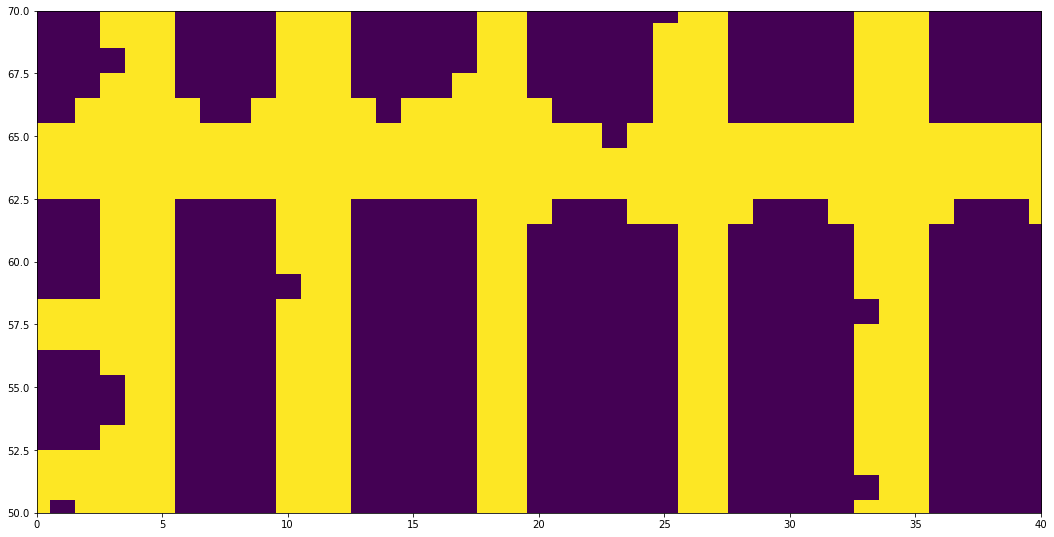

In [28]:
fig=plt.figure(figsize=(18,16))
plt.imshow(th3[:1000,0:5000])
xlim=[0,40]
ylim=[50,70]
plt.xlim (xlim)
plt.ylim (ylim)

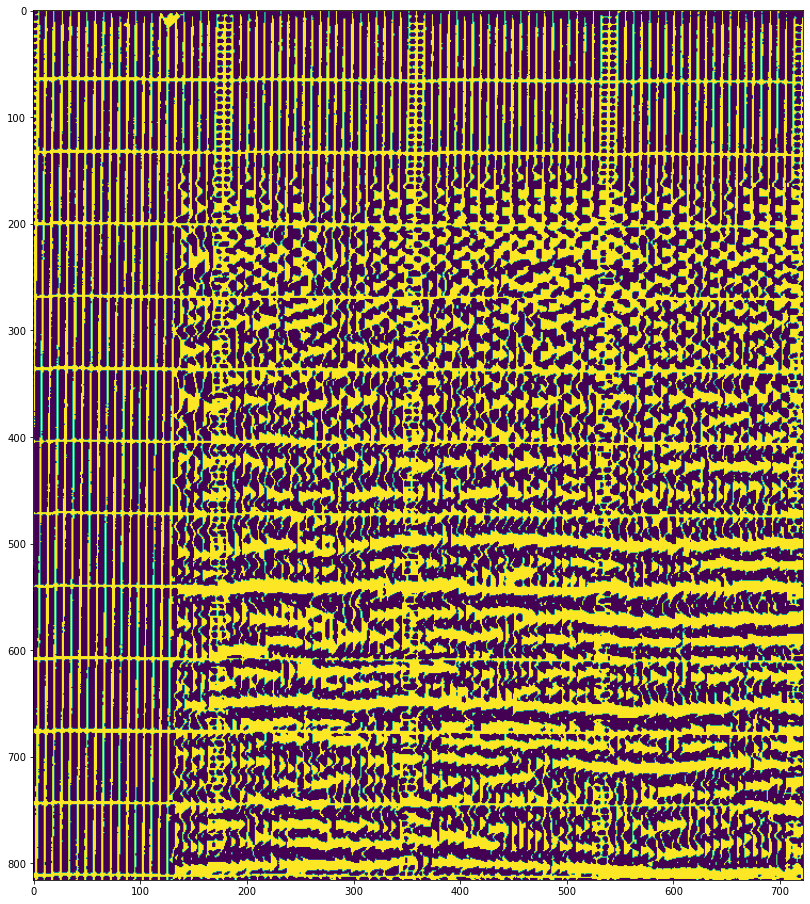

In [5]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,15).astype(float)
fig=plt.figure(figsize=(18,16))
th3[th3>0]=-1
th3[th3==0]=1
plt.imshow(th3)

4 112


(140.0, 250.0)

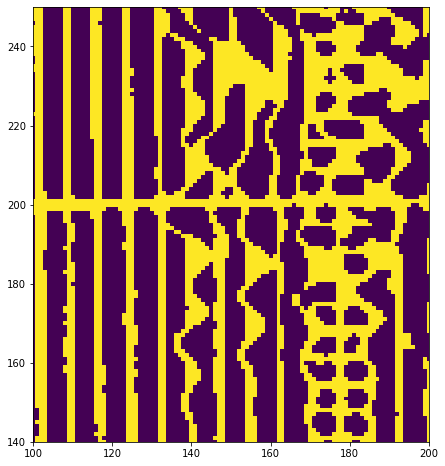

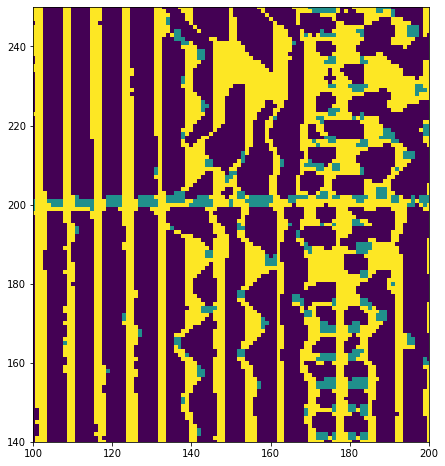

In [50]:
# vert_len=5
xlim=[100,200]
ylim=[140,250]
cgray=np.copy(th3)

fig=plt.figure(figsize=(18,8))
plt.imshow(cgray[:1000,0:5000])
plt.xlim (xlim)
plt.ylim (ylim)
# for centralrepeats in range(1,10):    
hor_len=2
centralrepeats=4
outerrepeats=3
kernel1 = np.vstack([[np.ones( hor_len, np.float32)*-1]*outerrepeats,[np.ones( hor_len, np.float32)]*centralrepeats, \
                     [np.ones( hor_len, np.float32)*-1]*outerrepeats])
kernel1
img = cv2.filter2D(src=th3, ddepth=-1, kernel=kernel1)
# thresh=vert_len*(hor_len+1)
thresh=np.abs(kernel1).sum()
thresh
print(centralrepeats,np.sum(img==thresh))

cgray[img>thresh-2*(centralrepeats+outerrepeats-1)]=0
# # img[img>=thresh]=1
# # img[img==0]=-1
# fig=plt.figure(figsize=(18,8))
# # plt.imshow(img)

# plt.imshow(cgray[:1000,0:5000])
# xlim=[0,3000]

fig=plt.figure(figsize=(18,8))
plt.imshow(cgray[:1000,0:5000])

plt.xlim (xlim)
plt.ylim (ylim)

In [18]:
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

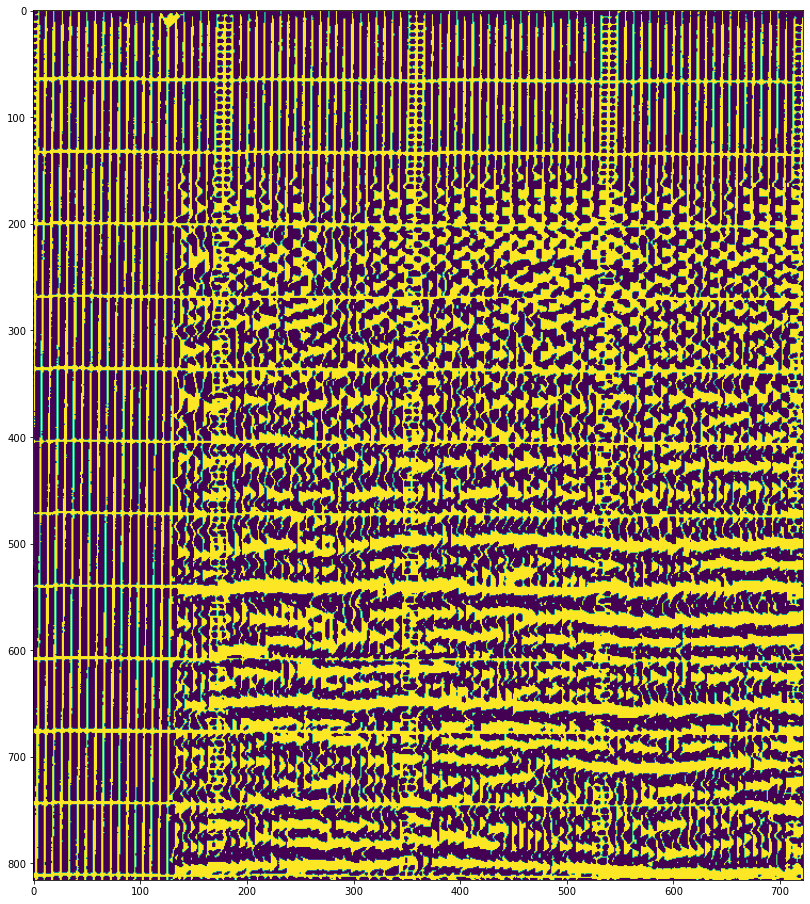

In [38]:


fig=plt.figure(figsize=(18,16))
plt.imshow(th3)
# plt.hist(th3.ravel())

In [ ]:
# Apply blurring kernel

kernel2 = np.ones((5, 5), np.float32) / 25




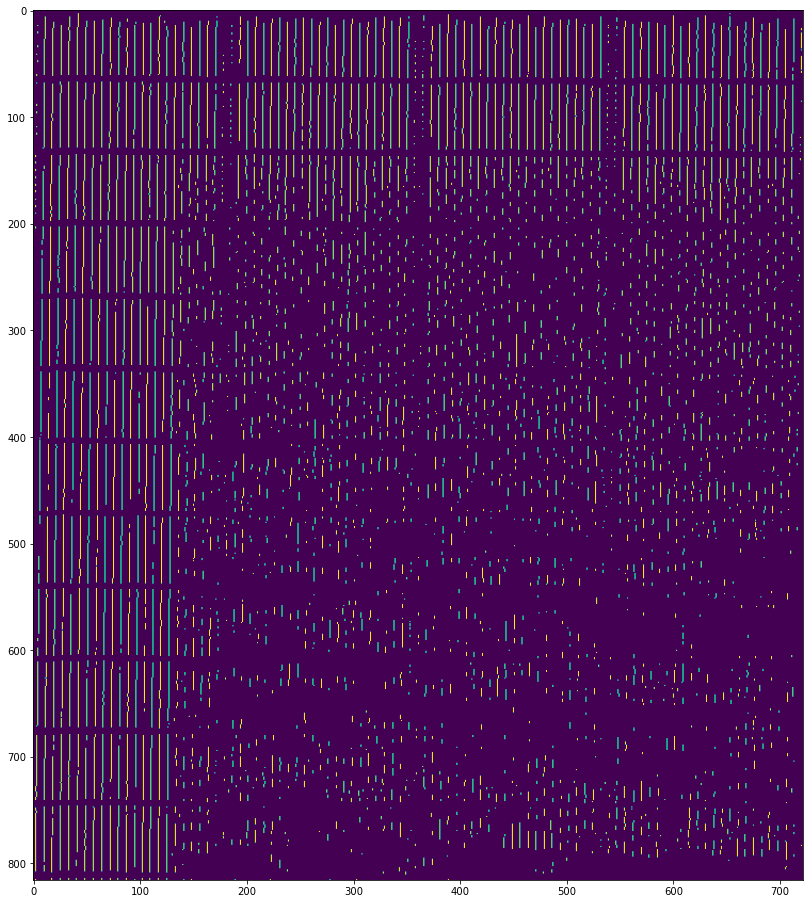

In [91]:
vert_len=5
hor_len=2
kernel1 = np.hstack([np.ones((vert_len, hor_len), np.float32)*-1,np.ones((vert_len, hor_len), np.float32)])
kernel1
img = cv2.filter2D(src=th3, ddepth=-1, kernel=kernel1)
thresh=vert_len*(hor_len+1)
img[img<thresh]=0
img[img>=thresh]=1
img[img==0]=-1
fig=plt.figure(figsize=(18,16))
plt.imshow(img)

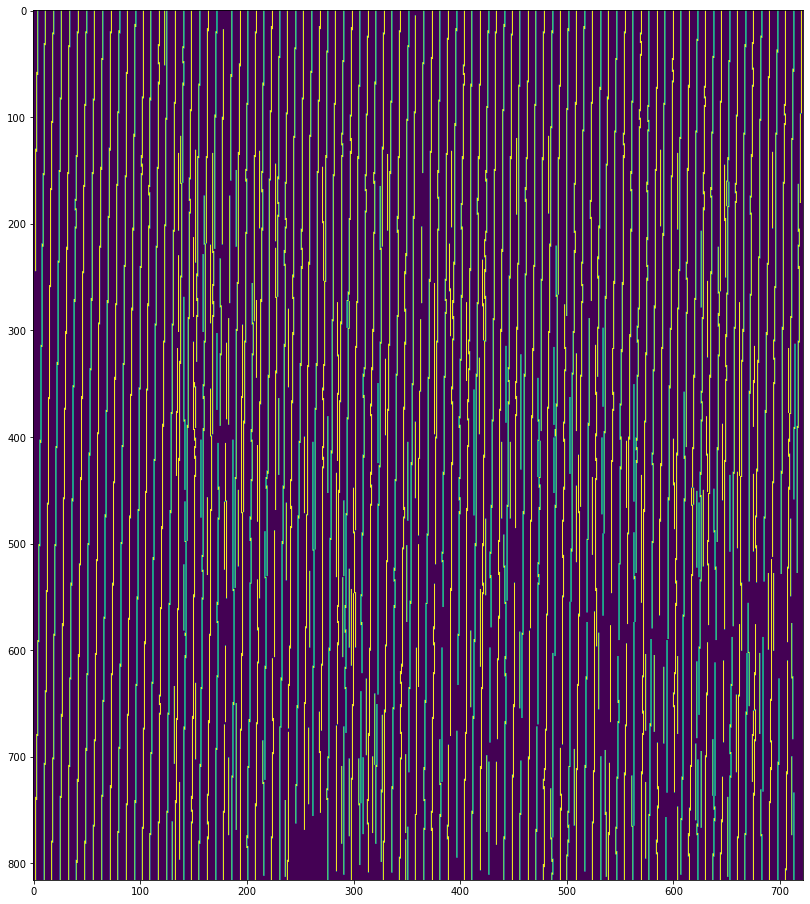

In [108]:
vert_len=10
hor_len=1
img2=np.copy(img)

kernel2 = np.hstack([np.ones((vert_len, hor_len), np.float32)*-1,np.ones((vert_len, hor_len), np.float32)*2
                    ,np.ones((vert_len, hor_len), np.float32)*-1])
for i in range(10):
    img2 = cv2.filter2D(src=img2, ddepth=-1, kernel=kernel2)
    thresh=vert_len*hor_len/2
    img2[img2<thresh]=0
    img2[img2>=thresh]=1
    img2[img2==0]=-1
fig=plt.figure(figsize=(18,16))
plt.imshow(img2)

[  3   6   8  10  13  15  17  20  23  25  28  31  33  36  39  41  44  46
  48  51  54  56  59  62  64  67  70  72  75  77  79  82  85  87  90  92
  94  97 100 102 105 107 109 112 115 117 120 122 124 127 130 132 135 138
 140 143 145 147 150 153 155 158 161 163 166 168 170 173 175 177 180 183
 185 188 191 193 196 198 200 203 206 208 211 213 215 218 220 222 225 228
 230 233 235 237 240 242 244 247 250 252 255 257 259 262 265 267 270 273
 275 278 280 282 285 287 289 292 295 298 301 303 305 308 310 312 315 318
 320 323 326 328 331 333 335 338 341 343 346 348 350 353 355 357 360 363
 365 368 371 373 376 378 380 383 386 388 391 393 395 398 401 403 406 408
 410 413 416 418 421 423 425 428 431 433 436 438 440 443 446 448 451 453
 455 458 461 463 466 468 470 473 476 478 481 483 485 488 491 493 496 498
 500 503 506 508 511 513 515 518 521 523 526 529 531 534 536 538 541 543
 545 548 551 553 556 559 561 564 566 568 571 574 576 579 582 584 587 589
 591 594 597 599 602 604 607 610 612 614 617 619 62

(0.0, 200.0)

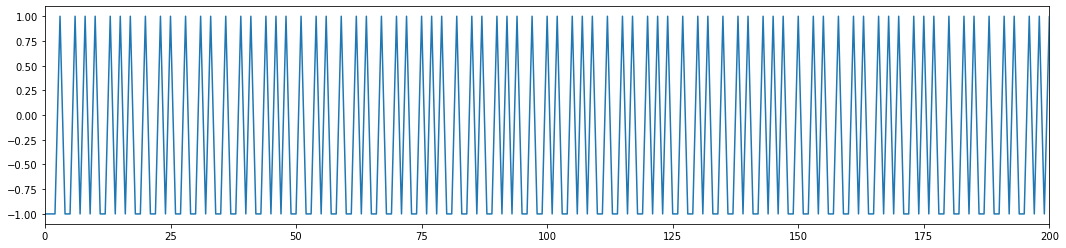

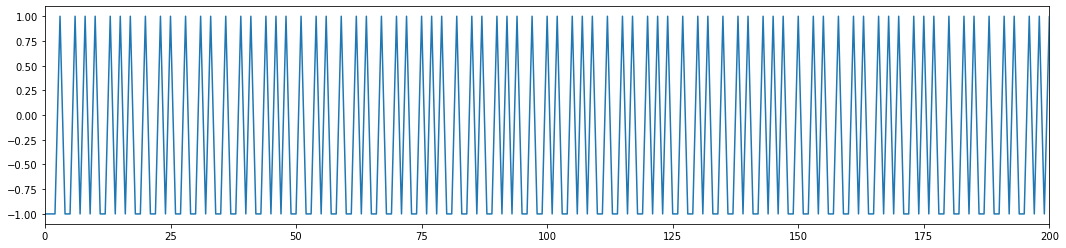

In [236]:
# plt.hist(img2.ravel())
xlim=[0,200]
i=120
trc=img2[i,:].copy()
# trc=img2[10,:].copy()
fig=plt.figure(figsize=(18,4))
plt.plot(trc)
plt.xlim(xlim)

# minLineLength,maxLineGap=20,10
def equalizeSpikes(trc):
    idxs=np.where(trc==1)[0]
    diffidxs=np.diff(idxs)
    print(idxs)
    med_pixpertrace=np.round(np.median(diffidxs)).astype(int)
    mn_pixpertrace=np.round(np.mean(diffidxs)).astype(int)
    print('med_pixpertrace,mn_pixpertrace ',med_pixpertrace,mn_pixpertrace)
    # print(np.median(diffidxs),np.mean(diffidxs).astype(int))
    isequaleverywhere=False
#     pixpertrace=np.min([mn_pixpertrace,med_pixpertrace])
#     mxpixpertrace=np.max([mn_pixpertrace,med_pixpertrace])
    pixpertrace=7
    mxpixpertrace=8
    if pixpertrace==mxpixpertrace:    
        pixpertrace-=1

    for i in range(len(diffidxs)-2):
        if (diffidxs[i]<pixpertrace):
            
#             print(i,diffidxs[i],pixpertrace)
    #         pre_d=idxs[i]-idxs[i-1]
    #         nxt_d=idxs[i+1]-idxs[i]
            if (diffidxs[i+1]<=pixpertrace)&(diffidxs[i+2]>=pixpertrace):    
                
                trc[idxs[i+1]]=-1
#                 print(d,idxs[i:i+2])
        elif (diffidxs[i]>mxpixpertrace): #(diffidxs[i+1]>=pixpertrace-1)&(diffidxs[i+1]<=pixpertrace+1):
#             print(int(d/pixpertrace))
            presentid=idxs[i]+pixpertrace
#             print('range(int(diffidxs[i]/(pixpertrace)) ',(diffidxs[i]/(pixpertrace)).astype(int))
            for j in range((diffidxs[i]/(pixpertrace)).astype(int)):
                trc[presentid]=1
                if j%2==0:
                    tobeadded=pixpertrace
                else:
                    tobeadded=mxpixpertrace
                presentid+=tobeadded
    return diffidxs,trc

diffidxs,trc=equalizeSpikes(trc)
# diffidxs,trc=equalizeSpikes(trc)
# diffidxs
fig=plt.figure(figsize=(18,4))
plt.plot(trc)
plt.xlim(xlim)

In [234]:
idxs=np.where(trc==1)[0]
diffidxs=np.diff(idxs)
np.unique(diffidxs)
# diffidxs
# # i=2
# # diffidxs[i]<pixpertrace
diffidxs

array([3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2,
       2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 5, 7], dtype=int64)

In [213]:
# list(range(0,img2.shape[0],20))

In [230]:
# np.round(7.49)
for i in range(0,img2.shape[0],20):
#     i=100
    trc=img2[i,:]
    diffidxs,trc=equalizeSpikes(trc)
#     print(diffidxs)
    idxs=np.where(trc==1)[0]
    diffidxs=np.diff(idxs)
    print(i,np.unique(diffidxs))
diffidxs

med_pixpertrace,mn_pixpertrace  8 8
0 [7 8]
med_pixpertrace,mn_pixpertrace  2 2
20 [1 2 7]
med_pixpertrace,mn_pixpertrace  8 8
40 [6 7 8]
med_pixpertrace,mn_pixpertrace  8 7
60 [7 8]
med_pixpertrace,mn_pixpertrace  8 8
80 [7 8]
med_pixpertrace,mn_pixpertrace  8 8
100 [6 7 8]
med_pixpertrace,mn_pixpertrace  3 4
120 [2 3 7]
med_pixpertrace,mn_pixpertrace  6 5
140 [1 2 3 5 6 7 8]
med_pixpertrace,mn_pixpertrace  6 5
160 [1 2 3 5 6 7 8]
med_pixpertrace,mn_pixpertrace  6 5
180 [1 2 3 5 6 8]
med_pixpertrace,mn_pixpertrace  6 5
200 [2 3 4 5 6 8]
med_pixpertrace,mn_pixpertrace  6 5
220 [1 2 3 4 5 6 8]
med_pixpertrace,mn_pixpertrace  6 5
240 [1 2 3 5 6 8]
med_pixpertrace,mn_pixpertrace  6 5
260 [1 2 3 5 6 7 8]
med_pixpertrace,mn_pixpertrace  6 5
280 [1 2 3 4 5 6 7 8]
med_pixpertrace,mn_pixpertrace  6 5
300 [1 2 3 4 5 6 8]
med_pixpertrace,mn_pixpertrace  6 5
320 [2 3 4 5 6 7 8]
med_pixpertrace,mn_pixpertrace  6 5
340 [1 2 3 4 5 6]
med_pixpertrace,mn_pixpertrace  6 5
360 [1 2 3 4 5 6 8]
med_pixper

array([6, 2, 7, 6, 2, 6, 2, 7, 6, 2, 6, 2, 6, 2, 6, 2, 7, 6, 2, 6, 2, 7,
       7, 6, 2, 6, 2, 6, 2, 6, 2, 7, 7, 6, 2, 6, 2, 7, 6, 2, 6, 2, 7, 7,
       6, 2, 7, 6, 2, 7, 7, 7, 6, 2, 7, 6, 2, 1, 6, 2, 7, 7, 6, 2, 6, 2,
       7, 7, 6, 2, 7, 6, 2, 7, 6, 2, 6, 2, 7, 6, 2, 7, 7, 1, 7, 6, 2, 6,
       2, 7, 7, 6, 2, 7, 6, 2, 7, 6, 2, 6, 2, 7, 6, 7, 2, 6, 2, 7, 6, 2,
       7, 6, 2, 7, 6, 2, 6, 2, 7, 6, 2, 6, 2, 7, 7, 6, 2, 6, 2, 7, 7, 7,
       7, 2, 7, 7, 6, 2, 6, 2, 7, 6, 2, 8, 7], dtype=int64)

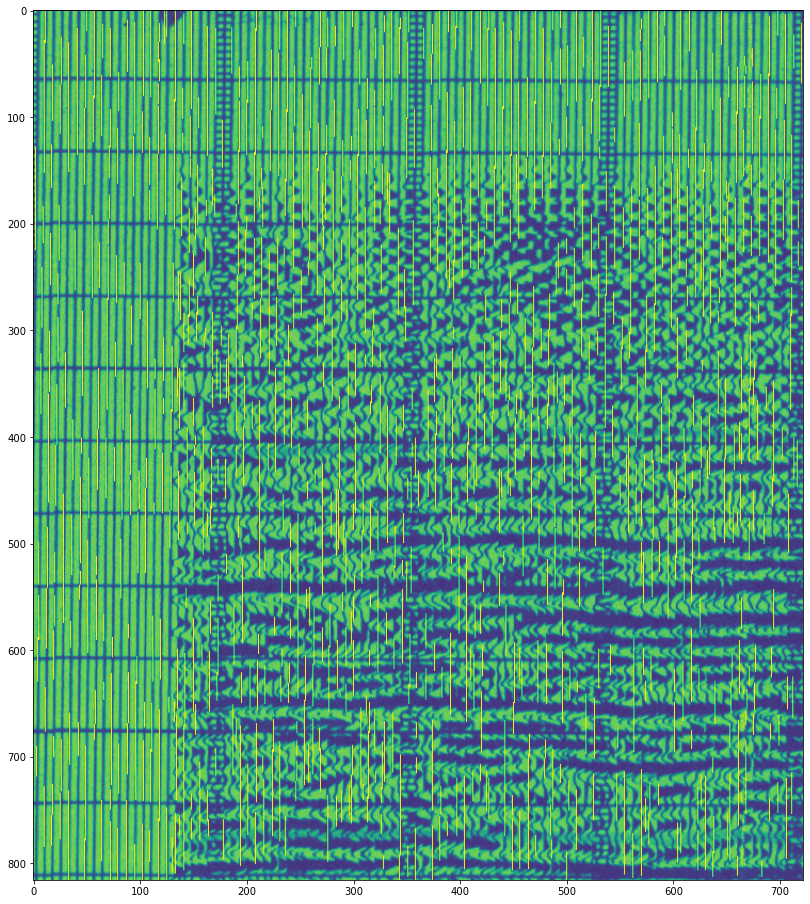

In [107]:
dst=np.copy(gray)
img2[img2<0]=0
img2[img2>0]=255
lines = cv2.HoughLinesP(img2.astype(np.uint8),1,np.pi/180,100,minLineLength,maxLineGap)
lines
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(dst,(x1,y1),(x2,y2),(255,255,255),1)
fig=plt.figure(figsize=(18,16))
plt.imshow(dst)

(0.0, 20.0)

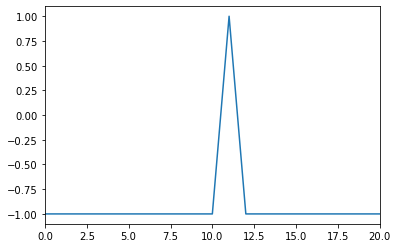

In [88]:
# plt.plot(img[10,:])
# plt.xlim([0,20])

(array([564752.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

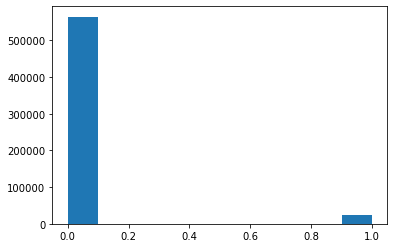

In [78]:
plt.hist(img.ravel())

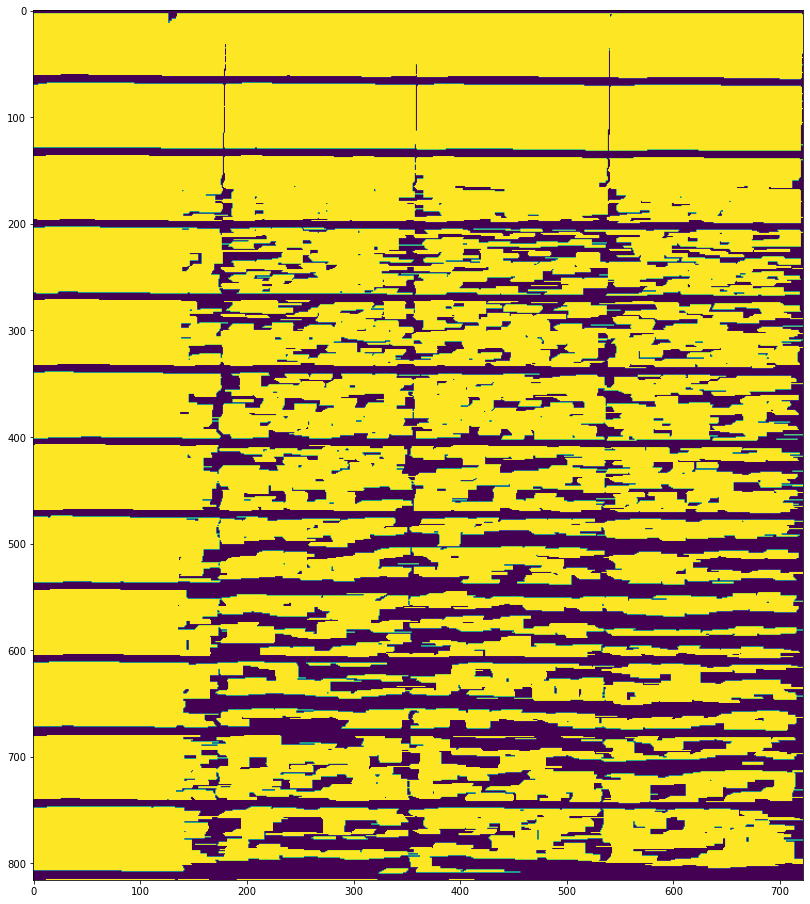

In [26]:
horizontal = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,-2)
rows,cols = horizontal.shape
horizontalsize=20
#     print('horizontalsize',horizontalsize)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
kernel = np.ones((5,3),np.uint8)
horizontal = cv2.erode(horizontal,kernel,iterations = 1)
# horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))

fig=plt.figure(figsize=(18,16))
plt.imshow(horizontal)
# xlim=[0,3000]

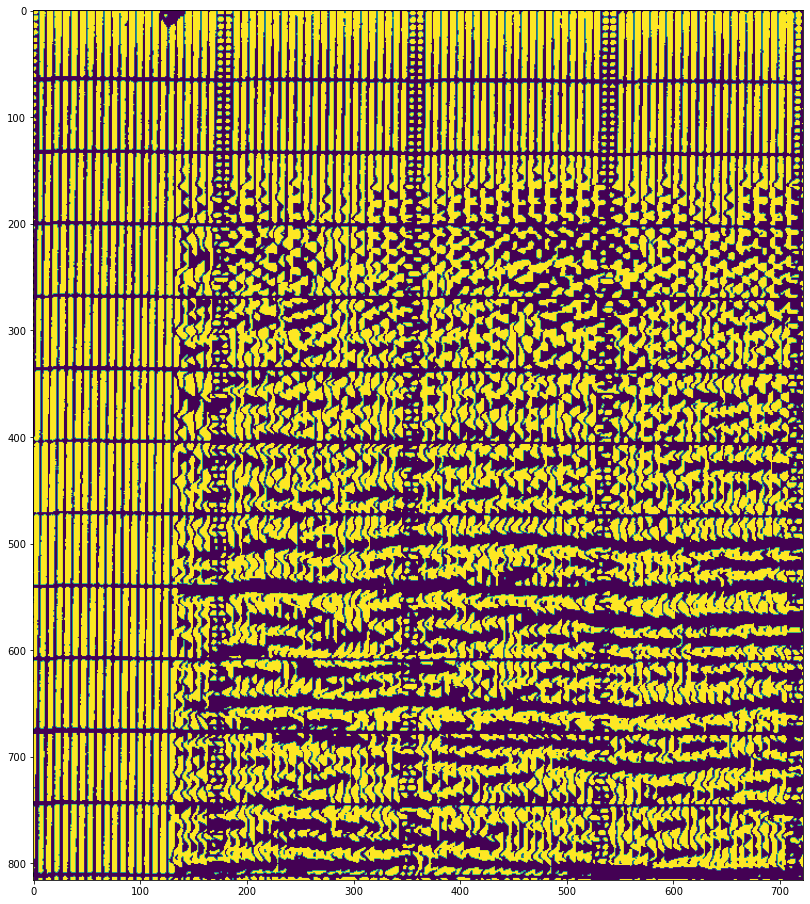

In [50]:
# dst = np.copy(image)
horizontal = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,-2)
apertureSize = 7
minLineLength = 100
maxLineGap = 50

# according to OpenCV, aperture size must be odd and between 3 and 7
if apertureSize % 2 == 0:
    apertureSize += 1
if apertureSize < 3:
    apertureSize = 3

# edges = cv2.Canny(gray,1000,200,apertureSize = apertureSize)
fig=plt.figure(figsize=(18,16))
plt.imshow(horizontal)
lines = cv2.HoughLinesP(horizontal,1,np.pi/180,100,minLineLength,maxLineGap)
# for x in range(0, len(lines)):
#     for x1,y1,x2,y2 in lines[x]:
#         cv2.line(dst,(x1,y1),(x2,y2),(255,255,255),5)

In [38]:
# horizontal = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,-2)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 90, minLineLength, maxLineGap)

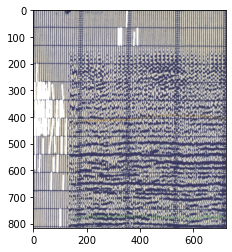

In [51]:
dst = np.copy(image)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(dst,(x1,y1),(x2,y2),(255,255,255),5)
plt.imshow(dst)
# lines

In [36]:
# np.histogram(mthresh.ravel())
# image=mthresh/255.

# clipped_im=gray.copy()
# thresh=clipped_im.mean()
# clipped_im[clipped_im<=thresh]=1
# clipped_im[clipped_im>=thresh]=0
# clipped_im=precisionFiltering(clipped_im).astype(float)

In [16]:
def gethorizontalLineFilter(hf_data,sgray):
    hf_data[hf_data>0]=0
    hf_data[hf_data>-0.05]=0
    hf_data[hf_data<=-0.05]=1
    
    ids=np.where(hf_data==1)
    difids=np.diff(ids)
    difids[difids>1]
    spike_interval=int(np.median(difids[difids>1]))
    # ,np.mean(difids[difids>1])
    _,spikewidths=np.where(difids>1)
    spikewidth=int(np.median(np.diff(spikewidths)))
#     spike_interval,spikewidth
    halfspikew=int(spikewidth/2)
    x = np.arange(-halfspikew+1, 1,1)
    mfilter=x**2/40+0.01
    if len(mfilter)*2==spikewidth:
        mfilter=np.array([*mfilter,*mfilter[::-1]])
    else:
        mfilter=np.array([*mfilter,mfilter[-1],*mfilter[::-1]])
    smallfilter=np.append([1]*spike_interval,mfilter)
    times=int(len(sgray)/len(smallfilter))
    fullfilter=np.array([*smallfilter]*(times+1))[:len(sgray)]
    return fullfilter
def img2rawtrace(mthresh,stime,etime,ntrc): #key function need filters before
    thresh=mthresh.copy()
    trange=np.arange(stime,etime+1,2).astype(int)
    pixper_trc=thresh.shape[1]/ntrc
    halfpixper_trc=int(pixper_trc/2)
    print('ntrc,thresh.shape,pixper_trc ',ntrc,thresh.shape,pixper_trc)

    pixrange=np.arange(halfpixper_trc,thresh.shape[1]-halfpixper_trc,pixper_trc).astype(int)
    # # 
    # thresh[thresh<100]=0
    # thresh[thresh>100]=1
    
    tmean=thresh.mean()
    if tmean>100:
        tmean=100
    
    thresh[thresh<tmean]=0
    thresh[thresh>tmean]=1
    # plt.hist(thresh)

    traces=[]
    for i in range(len(pixrange)-1):
    #     print(pixrange[i],pixrange[i+1])
        trc=pixper_trc*thresh[:,pixrange[i]-halfpixper_trc:pixrange[i+1]+halfpixper_trc].sum(axis=1)/(pixrange[i+1]-pixrange[i]+pixper_trc)
        nlesThalf=np.sum(trc<=pixper_trc/2)
        ngreThalf=np.sum(trc>pixper_trc/2)
        if ngreThalf/nlesThalf<0.01:
            trc[trc<=pixper_trc/2]=trc[trc<=pixper_trc/2]*0.3
#     print(nlesThalf,ngreThalf,ngreThalf/nlesThalf)
    
        traces.append(trc)
    traces=np.array(traces).astype(float)
    return traces

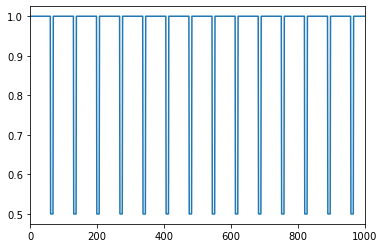

In [38]:
# hlfilter=gethorizontalLineFilter(hf_data)
# plt.plot(sgray)
twt=list(range(len(sgray)))
lf_data,wf_data,hf_data,xmaxnormmeans=windowFilt(twt,sgray,nclip=0,window=(1,10),order=4)

# useStepOp
hlfilter=gethorizontalLineFilter(hf_data,sgray)
hlfilter[hlfilter<=0.5]=0.5
plt.plot(hlfilter)
plt.xlim([0,1000])
plt.show()

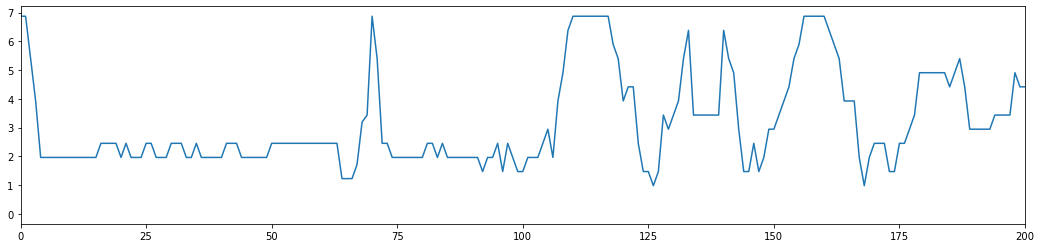

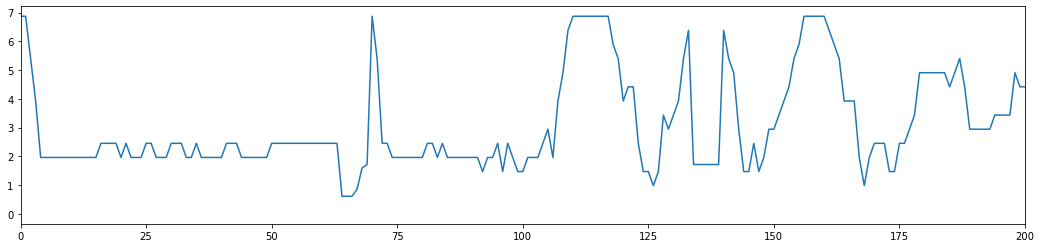

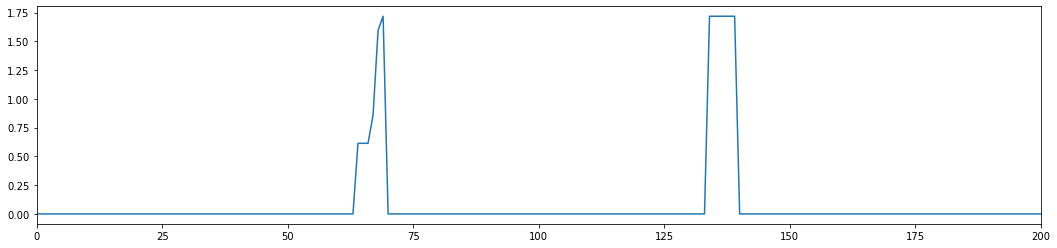

In [27]:
fig=plt.figure(figsize=(18,4))
xlim=[0,200]
plt.plot(mtrc)
plt.xlim(xlim)
plt.show()
hmtrc=mtrc*hlfilter
fig=plt.figure(figsize=(18,4))
plt.plot(hmtrc)
plt.xlim(xlim)
plt.show()

fig=plt.figure(figsize=(18,4))
plt.plot(mtrc-hmtrc)
plt.xlim(xlim)
plt.show()

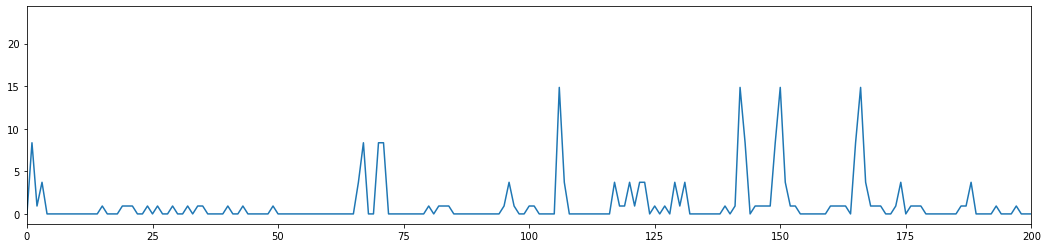

In [36]:
diff=np.diff(mtrc)
fig=plt.figure(figsize=(18,4))
plt.plot(diff**2)
plt.xlim([0,200])
plt.show()

In [34]:
def img2rawtrace(mthresh,stime,etime,ntrc): #key function need filters before
    thresh=mthresh.copy()
    trange=np.arange(stime,etime+1,2).astype(int)
    pixper_trc=thresh.shape[1]/ntrc
    print('ntrc,thresh.shape,pixper_trc ',ntrc,thresh.shape,pixper_trc)

    pixrange=np.arange(0,thresh.shape[1]+1,pixper_trc).astype(int)
    # # 
    # thresh[thresh<100]=0
    # thresh[thresh>100]=1
    
    tmean=thresh.mean()
    if tmean>100:
        tmean=100
    
    thresh[thresh<tmean]=0
    thresh[thresh>tmean]=1
    # plt.hist(thresh)

    traces=[]
    for i in range(len(pixrange)-1):
    #     print(pixrange[i],pixrange[i+1])
        trc=pixper_trc*thresh[:,pixrange[i]:pixrange[i+1]].sum(axis=1)/(pixrange[i+1]-pixrange[i])
        nlesThalf=np.sum(trc<=pixper_trc/2)
        ngreThalf=np.sum(trc>pixper_trc/2)
        if ngreThalf/nlesThalf<0.01:
            trc[trc<=pixper_trc/2]=trc[trc<=pixper_trc/2]*0.3
#     print(nlesThalf,ngreThalf,ngreThalf/nlesThalf)
    
        traces.append(trc)
    traces=np.array(traces).astype(float)
    return traces

In [33]:
# plt.hist(mthresh.ravel())

In [35]:
# bestcases={1:1,2:3,3:6}
sgray=gray.sum(axis=1)
cutoff = 30.0
bestcases={'_horlf':6}


mthresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

traces=img2rawtrace(mthresh,stime,etime,ntrc)
#     traces=successiveDeduction(traces,ntraces=200)
trcno=200
mtrc=traces[trcno]


# if useHorfilter:
#     mtrc=mtrc*hlfilter

# if not useStepOp:
#     op=getOperator(mtrc,old=False)
# else:
#     op=getOperatorStep(mtrc)


# # Filter or not and make resultant traces as float64 type
# tracet=traces.shape[1]
# actualt=etime
# tracetpermsec=tracet/etime
# for50msec=tracetpermsec*30
# traces[:,:int(for50msec)]=traces[:,:int(for50msec)]*0.1

# if useHorfilter:
#     result=(np.array(traces)*hlfilter*1000).astype(np.float64)
# else:
#     result=(np.array(traces)*1000).astype(np.float64)

# print(traces.shape,result.shape)
# trange=np.arange(stime,etime+1,2).astype(int)
# proctrcs= getOpProcTraces(result,op,trange)
# #     filttrcs=np.array(proctrcs)
# filttrcs= getLowPassfilteredTraces(proctrcs,cutoff = cutoff )



# inputdict=dict(dstpath=datafolder+file.replace('_crop.png','')+'_raw{}.sgy'.format(key),srcpath='bak_test2.sgy',
#            mintime=1300,mxtime=1500,dt=1,iline=1, xline=169, offset=0)

# status=saveAsSegy(filttrcs.T,inputdict=inputdict,delrt=2,strc=strc,setimes=[stime,etime])
# if status:    
#     print('Done export..',inputdict['dstpath'])
# else:
#     print('Export incomplete..')
# fig=plt.figure(figsize=(16,16))
# #     plt.imshow(filttrcs.T[:800,-800:])
# plt.imshow(filttrcs.T)
# plt.show()

ntrc,thresh.shape,pixper_trc  3817 (4154, 29429) 7.709981660990307


Case:  6
hlfilter
ntrc,thresh.shape,pixper_trc  3817 (4154, 29429) 7.709981660990307
0.0 :  nan
0.24538480780455266 :  0.0
0.4907696156091053 :  0.8518518518518519
0.7361544234136579 :  0.625
0.9815392312182106 :  1.0606060606060606
1.2269240390227634 :  0.43478260869565216
1.4723088468273158 :  0.9458333333333333
1.7176936546318686 :  0.3333333333333333
1.9630784624364213 :  1.1891891891891893
2.208463270240974 :  0.5384615384615384
2.4538480780455267 :  0.5993150684931506
2.6992328858500794 :  1.1111111111111112
2.9446176936546316 :  0.5
3.1900025014591846 :  0.0
3.4353873092637373 :  0.7672955974842768
3.9261569248728425 :  0.6074074074074074
4.416926540481948 :  0.4537037037037037
4.9076961560910535 :  0.4095238095238095
5.398465771700159 :  0.77
5.889235387309263 :  0.6818181818181818
6.380005002918369 :  0.4084507042253521
6.8707746185274745 :  4.465116279069767
signal_len  0.032
32
(3816, 4154) (3816, 4154)
(3001, 3816)
Reday to go
3816
Done export.. D:\Ameyem\Bhugarbho\JOGMEC\S

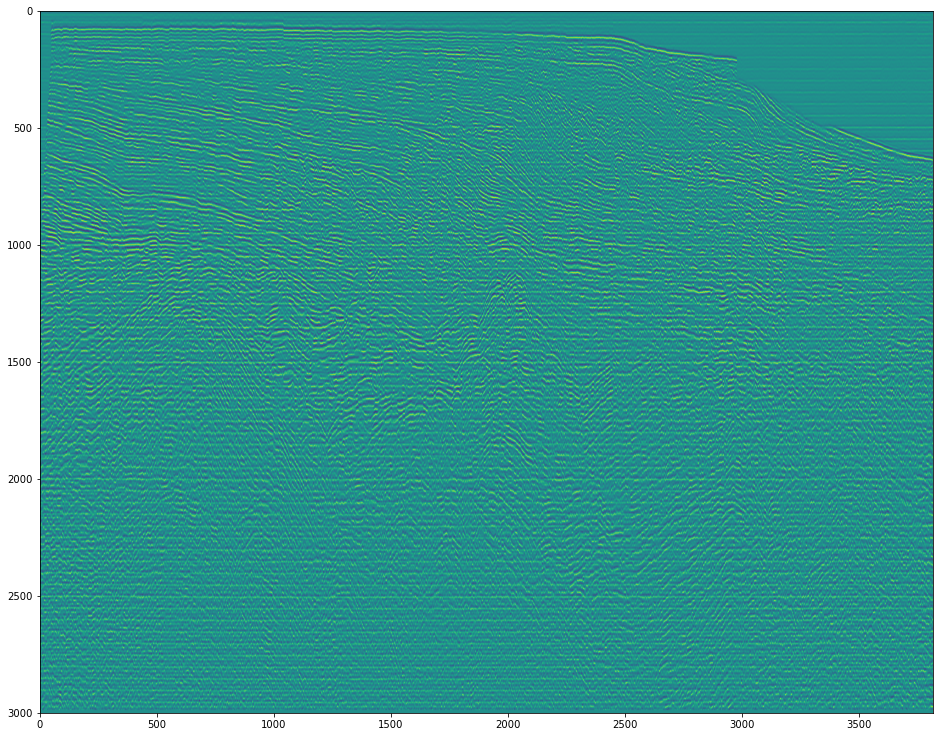

In [20]:
# bestcases={1:1,2:3,3:6}
sgray=gray.sum(axis=1)
cutoff = 30.0
bestcases={'_horlf':6}
for key in bestcases:
    case=bestcases[key]

# for case in range(1,7):
    print('Case: ',case)
    crude_hor_filter,useStepOp,useHorfilter=getDirections(case)
    #Horizontal filter calculation to remove horizontal lines
    twt=list(range(len(sgray)))
    lf_data,wf_data,hf_data,xmaxnormmeans=windowFilt(twt,sgray,nclip=0,window=(1,10),order=4)
    useHorfilter=True
    crude_hor_filter=False
    if useHorfilter:
        if not crude_hor_filter:
            hlfilter=gethorizontalLineFilter(hf_data,gray) #median gap found and kept lo values to nullify horizontal line
            hlfilter[hlfilter<=0.5]=0.5
            print('hlfilter')
        else:
            hlfilter=getHorizontalRawFilter(hf_data) #filter generate with crude way, line gaps are filled with 0.1 values

    mthresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #     traces=img2rawtrace(clipped_im,stime,etime,ntrc)
    traces=img2rawtrace(mthresh,stime,etime,ntrc)
#     traces=successiveDeduction(traces,ntraces=200)

    # fig=plt.figure(figsize=(18,16))
    # plt.imshow(traces.T)


    # plt.plot(traces[:,int(for50msec)])

    #Operator for smooth trace
    trcno=200
    mtrc=traces[trcno]
    
    
    if useHorfilter:
        mtrc=mtrc*hlfilter
    
    if not useStepOp:
        op=getOperator(mtrc,old=False)
    else:
        op=getOperatorStep(mtrc)
        

    # Filter or not and make resultant traces as float64 type
    tracet=traces.shape[1]
    actualt=etime
    tracetpermsec=tracet/etime
    for50msec=tracetpermsec*30
    traces[:,:int(for50msec)]=traces[:,:int(for50msec)]*0.1
    
    if useHorfilter:
        result=(np.array(traces)*hlfilter*1000).astype(np.float64)
    else:
        result=(np.array(traces)*1000).astype(np.float64)

    print(traces.shape,result.shape)
    trange=np.arange(stime,etime+1,2).astype(int)
    proctrcs= getOpProcTraces(result,op,trange)
#     filttrcs=np.array(proctrcs)
    filttrcs= getLowPassfilteredTraces(proctrcs,cutoff = cutoff )
    

    
    inputdict=dict(dstpath=datafolder+file.replace('_crop.png','')+'_raw{}.sgy'.format(key),srcpath='bak_test2.sgy',
               mintime=1300,mxtime=1500,dt=1,iline=1, xline=169, offset=0)

    status=saveAsSegy(filttrcs.T,inputdict=inputdict,delrt=2,strc=strc,setimes=[stime,etime])
    if status:    
        print('Done export..',inputdict['dstpath'])
    else:
        print('Export incomplete..')
    fig=plt.figure(figsize=(16,16))
#     plt.imshow(filttrcs.T[:800,-800:])
    plt.imshow(filttrcs.T)
    plt.show()

In [74]:
# thresh=mthresh.copy()
# trange=np.arange(stime,etime+1,2).astype(int)
# pixper_trc=thresh.shape[1]/ntrc
# print('ntrc,thresh.shape,pixper_trc ',ntrc,thresh.shape,pixper_trc)

# pixrange=np.arange(0,thresh.shape[1]+1,pixper_trc).astype(int)
# pixrange
# traces=img2rawtrace(clipped_im,stime,etime,ntrc)
# type(traces[0][0])
# traces

ntrc,thresh.shape,pixper_trc  1201 (2633, 8063) 6.713572023313905


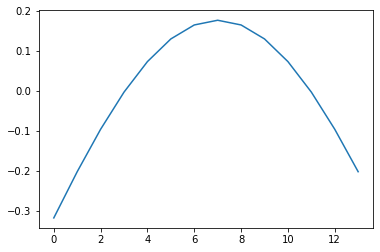

In [6]:
plt.plot(op)

In [75]:
# # np.diff(pixrange)
# for trno in [-1,-2,-5,-6,-7,-10,-11,-12,-15,-100]:
#     fig=plt.figure(figsize=(18,4))
#     plt.plot(traces[trno])
#     plt.show()


#     halflenop=int(len(op)/2)

#     trc=traces[trno]
#     # trc[trc<=3]=0
#     nlesThalf=np.sum(trc<=pixper_trc/2)
#     ngreThalf=np.sum(trc>pixper_trc/2)
#     if ngreThalf/nlesThalf<0.01:
#         trc[trc<=pixper_trc/2]=trc[trc<=pixper_trc/2]*0.01
#     print(nlesThalf,ngreThalf,ngreThalf/nlesThalf)
# #     plt.hist(trc,10)
#     trc=trc*1000
#     #     res=np.convolve(trc,op)[3:len(trc)+3]
#     res=np.convolve(trc,op)[halflenop:len(trc)+halflenop]
#     f = signal.resample(res, len(trange))
#     fig=plt.figure(figsize=(18,4))
#     plt.plot(f)
#     plt.show()

In [28]:
# plt.plot(filttrcs[-1])
# traces.shape
# plt.plot(traces[-1])
# mthresh.shape[1],traces.shape[0]

(8063, 1201)

In [73]:
# fig=plt.figure(figsize=(16,4))
# # plt.imshow((filttrcs[:100]-filttrcs[:100].mean(axis=0)).T)
# # # plt.plot(filttrcs[:100].mean(axis=0))
# # # filttrcs[:100].mean(axis=0)
# # countmeans
# mtrc=traces[trcno]
# mtrc
# # plt.plot(mtrc)
result.shape

(1201, 3968)

In [63]:
# np.unique(mtrc)
mtrc

array([0.  , 0.  , 0.  , ..., 6.  , 9.  , 0.07])

In [65]:
# def getCounts(mtrc):
counts={}
for i in np.unique(mtrc):
    counts[i]=[]
count=0
for i in range(1,len(mtrc)):
#     st=mtrc[i-1]
    if mtrc[i-1]==mtrc[i]:
        count+=1
    else:
        counts[mtrc[i-1]].append(count)
        count=0
#     return counts
counts

{0.0: [38,
  3,
  0,
  0,
  0,
  0,
  8,
  6,
  8,
  6,
  8,
  0,
  4,
  2,
  9,
  15,
  10,
  5,
  14,
  6,
  1,
  5,
  8,
  0,
  0,
  13,
  4],
 0.07000000000000028: [],
 1.0: [5,
  0,
  5,
  1,
  0,
  0,
  1,
  3,
  3,
  4,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  4,
  2,
  0,
  0],
 2.0: [0,
  0,
  0,
  0,
  2,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  2,
  5,
  3,
  0,
  0,
  7,
  1,
  0,
  4,
  9,
  5,
  5,
  4,
  4,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  4,
  0,
  2,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 3.0: [0,
  0,
  0,
  2,
  0,
  1,
  1,
  1,
  0,
  2,
  7,
  0,
  0,
  1,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  2,
  0,
  0,
  6,
  1,
  0,
  2,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  3,
  2,
  9,
  1,
  2,
  5,
  0,
  7,
  0,
  4,
  4,
  8,
  2,
  9,
  9,
  0,
  4,
  2,
  0,
  1,
  12,
  0,
  0,
  12,
  3,
  0,
  0,

In [56]:
# def getOperator(mtrc):

counts=getCounts(mtrc)
countmeans={}
for k in counts  :
#     print(k,': ',np.mean(counts[k]))
    countmeans[k]=np.mean(counts[k])
hlfop_len=int(np.sum([countmeans[k] for k in countmeans]))
f=10
signal_len=2*hlfop_len/1000
print(2*hlfop_len)
dt=0.002

# mlen=peak_loc*2
mlen=2*signal_len
peak_loc=mlen/2
t = np.linspace(-peak_loc, mlen - peak_loc - dt, int(mlen / dt))

# Shift time to the correct location
# t_out = t + peak_loc  # time shift Ricker wavelet based on peak_loc

# Generate Ricker wavelet signal based on reference
op = (1 - 2 * np.pi ** 2 * f ** 2 * t ** 2) * np.exp(
    -np.pi ** 2 * f ** 2 * t ** 2)

op=op-op.mean()
#     return op

C:\Users\ArunBabu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ArunBabu\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

In [67]:
np.mean([])

nan

In [147]:
# len(mtrc),len(hlfilter),len(hf_data)
# crude_hor_filter,useStepOp,useHorfilter=getDirections(case)
# #Horizontal filter calculation to remove horizontal lines
# twt=list(range(len(sgray)))
# lf_data,wf_data,hf_data,xmaxnormmeans=windowFilt(twt,sgray,nclip=0,window=(1,10),order=4)
# if not useStepOp:
#     op=getOperator(mtrc)
# else:
#     op=getOperatorStep(mtrc)

# mthresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# traces=img2rawtrace(mthresh,stime,etime,ntrc)
# ntraces=100
# for ntraces in [5,10,20,50,100,200]:
    for i in range(0,len(traces),ntraces):
        start=i
        endt=i+ntraces
    #     print(start,endt)
        if endt>len(traces):
            endt=len(traces)
        parttraces=traces[i:i+ntraces]
        meantrc=np.mean(parttraces,axis=0)
        maxval=np.max(meantrc)
        meantrc[meantrc<maxval-0.05*maxval]=0
        traces[i:i+ntraces]=parttraces-meantrc
#     #     break
#     # traces=successiveDeduction(traces,ntraces=100)
#     # plt.plot(op)
#     fig=plt.figure(figsize=(16,16))
#     plt.imshow(traces.T)
# #     plt.ylim([0,400])
# #     plt.xlim([75,125])
#     plt.show()

In [160]:
# result=(np.array(traces)*1000).astype(np.float64)
# plt.plot(traces[-1])

        # todeductrace=
#         plt.plot(meantrc)

In [90]:


#Operator for smooth trace
trcno=200
mtrc=traces[trcno]

if useHorfilter:
    mtrc=mtrc*hlfilter

if not useStepOp:
    op=getOperator(mtrc)
else:
    op=getOperatorStep(mtrc)

# Filter or not and make resultant traces as float64 type
if useHorfilter:
    result=(np.array(traces)*hlfilter*1000).astype(np.float64)
else:
    result=(np.array(traces)*1000).astype(np.float64)

print(traces.shape,result.shape)
trange=np.arange(stime,etime+1,2).astype(int)
proctrcs= getOpProcTraces(result,op,trange)
filttrcs= getLowPassfilteredTraces(proctrcs)

inputdict=dict(dstpath=datafolder+file.replace('_crop.png','')+'_raw{}.sgy'.format(key),srcpath='bak_test2.sgy',
           mintime=1300,mxtime=1500,dt=1,iline=1, xline=169, offset=0)

status=saveAsSegy(filttrcs.T,inputdict=inputdict,delrt=2)
if status:    
    print('Done export..',inputdict['dstpath'])
else:
    print('Export incomplete..')
fig=plt.figure(figsize=(16,16))
#     plt.imshow(filttrcs.T[:800,-800:])
plt.imshow(filttrcs.T)
plt.show()

(3011, 3007, 3007)

3007


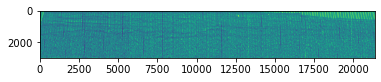

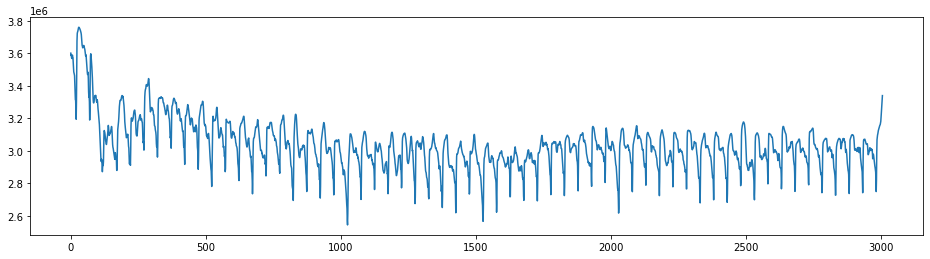

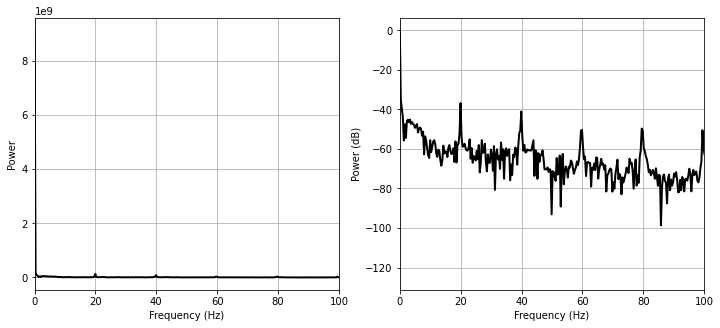

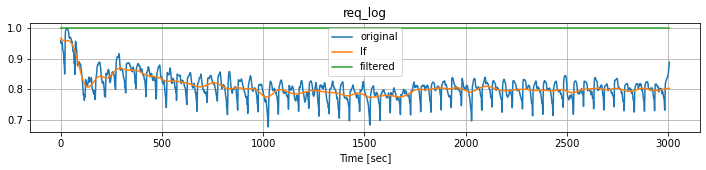

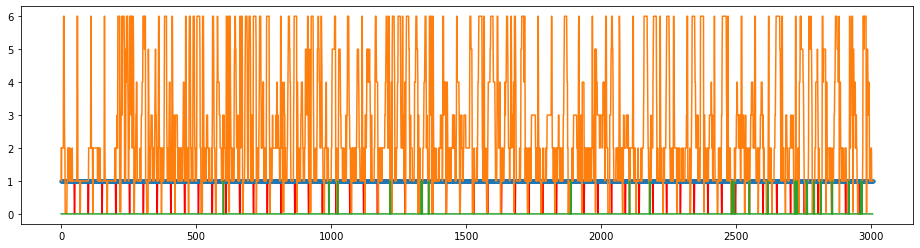

In [59]:
#key insights

plt.imshow(gray)
# thresh[:10,:100]
sgray=gray.sum(axis=1)
print(len(sgray))
fig=plt.figure(figsize=(16,4))
plt.plot(sgray)
freq, SIGNAL =ampspec(sgray,1,smooth=False)
plot_ampspec(freq, SIGNAL,name=None,img_fpath=None)


myplot(twt,[sgray/xmaxnormmeans,lf_data+wf_data,hf_data],['original','lf','filtered','hfdata'],mtitle='req_log')
# myplot(twt,[sgray/xmaxnormmeans,(lf_data+wf_data)],['original','filtered','hfdata'],mtitle='req_log')
fig=plt.figure(figsize=(16,4))
plt.plot(hlfilter,'-r')

plt.plot(hlfilter_raw,'.')


# plt.imshow( np.array(traces).T[:40,:20])
otrc=traces[2928]
otrc=otrc*fullfilter
# plt.figure(figsize=(16,4))
# plt.plot(otrc)
mtrc=otrc.copy()
plt.plot(mtrc)
mtrc[mtrc>0]=10
dtrc=np.diff(mtrc.astype(float))
dtrc[dtrc>0]=1
dtrc[dtrc<0]=0
round(len(dtrc)/dtrc.sum())
plt.plot(dtrc)

# len(trange),pixper_trc
# traces.min()

# plt.figure(figsize=(16,4))
# plt.plot(otrc,'r')
# plt.plot(otrc*fullfilter,'g')

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(proctrcs[trcno]),len(proctrcs[trcno]),len(proctrcs[trcno])
plt.show()
# fromsample=5
# plt.plot(t[:len(t)-fromsample], , 'g-', linewidth=2, label='filtered data')
plt.figure(figsize=(16,4))
plt.plot(proctrcs[trcno]),len(proctrcs[trcno]),len(proctrcs[trcno])
plt.plot(filttrcs[trcno]),len(filttrcs[trcno]),len(filttrcs[trcno])